<a href="https://colab.research.google.com/github/beoharambar/Prodigy-ML-Task1/blob/main/Linear_Regression_Model_for_House_Price_Prediction_using_California_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Step 2: Load the Dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Optional: Add a new column for price in dollars
df['Price'] = df['MedHouseVal'] * 100000  # converting to actual dollar values

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,342200.0


In [5]:
# Step 3: Select Features and Target
# We'll use square footage approximation = AveRooms * AveOccup
df['ApproxSqFt'] = df['AveRooms'] * df['AveOccup'] * 250  # Rough approx
df_model = df[['ApproxSqFt', 'AveRooms', 'AveBedrms', 'Price']]

# Drop any NaNs (precaution)
df_model = df_model.dropna()


In [6]:
# Step 4: Define Features and Labels
X = df_model[['ApproxSqFt', 'AveRooms', 'AveBedrms']]
y = df_model['Price']

# Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Step 5: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
# Step 6: Evaluate the Model
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.1065
RMSE: 108204.40


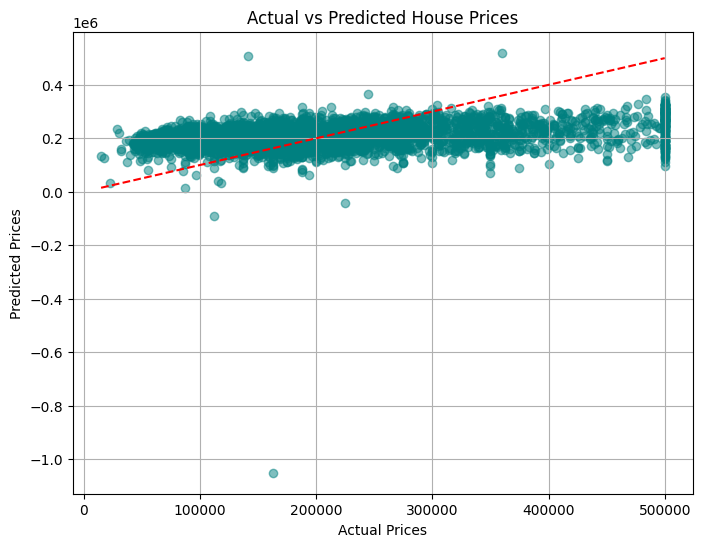

In [9]:
# Step 7: Visualize Predictions vs Actuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()
